## Community detection

Community detection is a powerful technique for analysing spatial networks, offering a variety of methods to uncover meaningful structures. At its core, community detection identifies highly connected subcomponents within a graph, which can reveal important patterns and relationships. The interpretation of these communities depends on the context of the graph, allowing researchers to gain insights into the underlying dynamics of the system being studied.


In this tutorial, we'll conduct community detection using our `community_detection` function in the `networks` submodule of MuSpAn. 

MuSpAn domain loaded successfully. Domain summary:
Domain name: Aggregation
Number of objects: 2000
Collections: ['Cell centres']
Labels: ['Celltype'] 
Networks: [] 
Distance matrices: []


(<Figure size 1000x800 with 2 Axes>, <Axes: >)

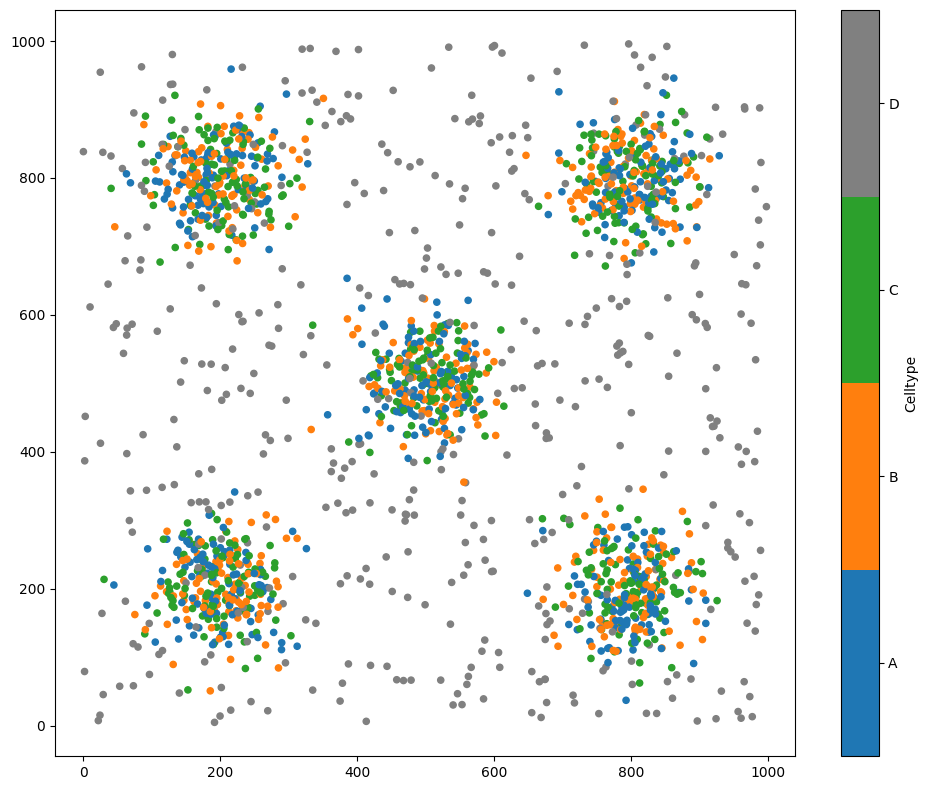

In [1]:
# Import necessary libraries
import muspan as ms
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Load example domain dataset
example_domain = ms.datasets.load_example_domain('Synthetic-Points-Aggregation')

# Visualise the example domain, coloring by 'Celltype'
ms.visualise.visualise(example_domain, color_by='Celltype')

Let's generate a network to run community detection on.

(<Figure size 1000x700 with 2 Axes>, <Axes: >)

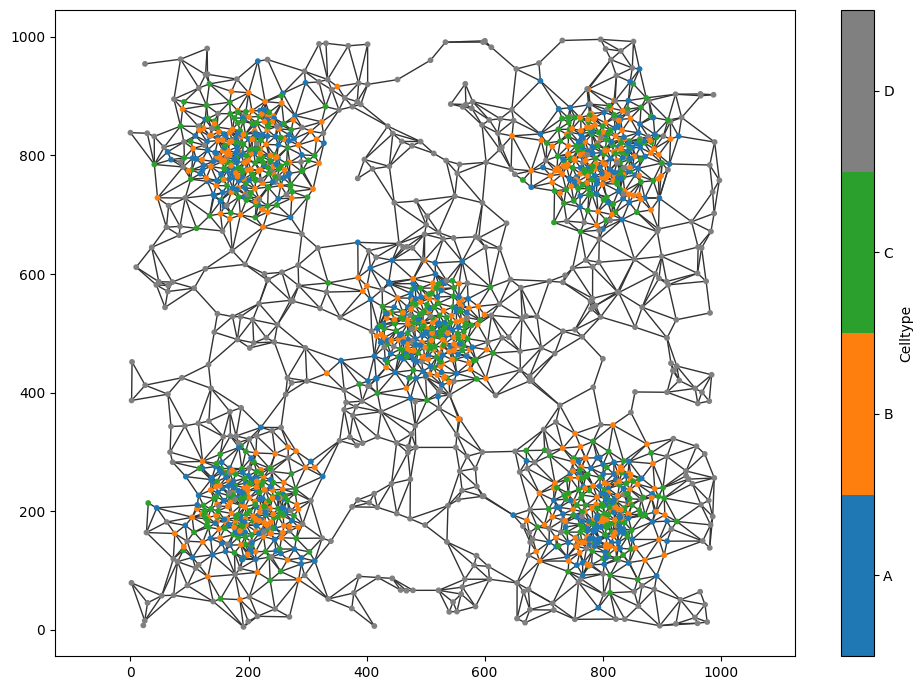

In [2]:
# Generate the 'Centroid Delaunay' network for the example domain
ms.networks.generate_network(
    example_domain,
    network_name='Centroid Delaunay',
    network_type='Delaunay',
    max_edge_distance=70
)

# Visualise the generated network, coloring by 'Celltype'
ms.visualise.visualise_network(
    example_domain,
    network_name='Centroid Delaunay',
    visualise_kwargs=dict(color_by='Celltype', marker_size=10),
    figure_kwargs=dict(figsize=(10, 7))
)

We perform community detection using the `community_detection` function in the `networks` submodule. Specifically, we use the Louvain community detection method, which aims to optimise modularity—ensuring there are more edges within a community than between different communities. This method has several parameters that can influence the behavior of community detection. We recommend reviewing the Louvain algorithm for a deeper understanding: https://doi.org/10.1088/1742-5468/2008/10/P10008.

In particular, the `resolution` parameter plays a key role in controlling the size of the detected communities. A higher resolution value tends to identify smaller, more localised communities, while a lower value results in larger, more global groupings. Adjusting this parameter allows you to tailor the community detection process to your specific needs.

Let's see how this communtity detection method runs on our network using the default resolution parameter.

In [3]:
# Perform community detection using the Louvain method with a resolution of 1
communities_res_1=ms.networks.community_detection(
    example_domain,
    network_name='Centroid Delaunay',
    edge_weight_name=None,
    community_method='louvain',
    community_method_parameters=dict(resolution=1),
    community_label_name='Communities : Res = 1'
)

The `community detection` function adds the community labels to the objects by default and are stored under the `community_label_name` label name. This output can be used for futher analysis or querying.

In addition, the output of the function is a dictionary of the communities, where the keys are the community IDs which each have a list of the object ID in that community. We can see this below.

In [4]:
print(communities_res_1)

{0: [np.int64(514), np.int64(520), np.int64(13), np.int64(272), np.int64(530), np.int64(277), np.int64(790), np.int64(535), np.int64(534), np.int64(536), np.int64(279), np.int64(796), np.int64(29), np.int64(285), np.int64(296), np.int64(553), np.int64(557), np.int64(303), np.int64(305), np.int64(567), np.int64(572), np.int64(574), np.int64(319), np.int64(581), np.int64(586), np.int64(590), np.int64(606), np.int64(619), np.int64(108), np.int64(623), np.int64(372), np.int64(638), np.int64(642), np.int64(645), np.int64(650), np.int64(651), np.int64(652), np.int64(148), np.int64(669), np.int64(414), np.int64(161), np.int64(675), np.int64(676), np.int64(677), np.int64(680), np.int64(689), np.int64(690), np.int64(693), np.int64(703), np.int64(192), np.int64(709), np.int64(712), np.int64(714), np.int64(205), np.int64(463), np.int64(213), np.int64(474), np.int64(730), np.int64(478), np.int64(739), np.int64(746), np.int64(752), np.int64(501), np.int64(503), np.int64(504), np.int64(507), np.int6

As the `community_detection` function automatically adds these communtites as labels ot our objects, we can visualise this communities with our standard `visualise` functionality.

(<Figure size 1000x700 with 3 Axes>, <Axes: >)

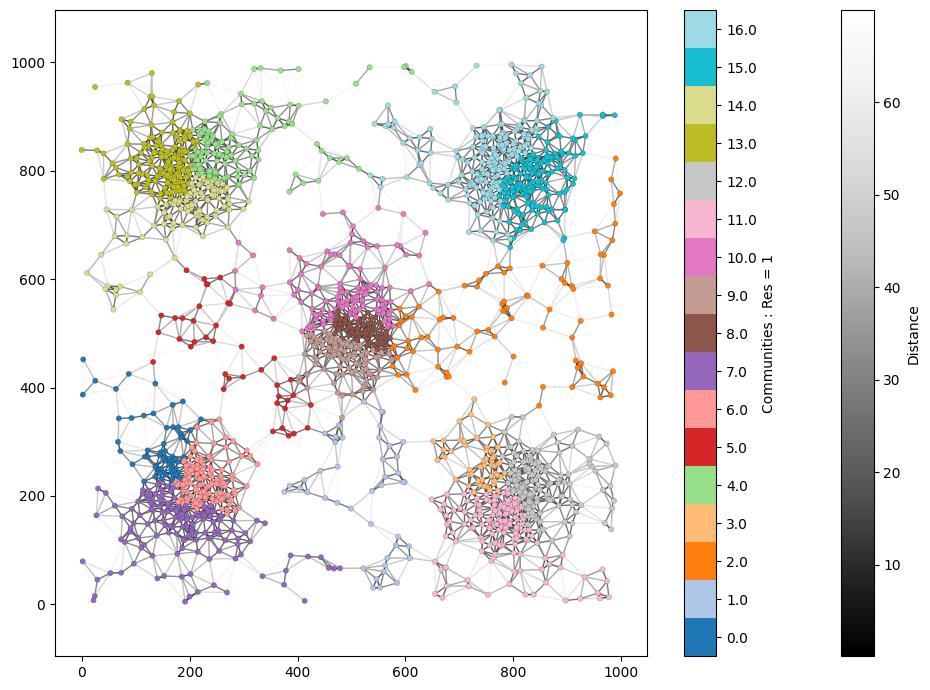

In [5]:
# Visualise the network with communities detected at resolution 1
ms.visualise.visualise_network(
    example_domain,
    network_name='Centroid Delaunay',
    edge_weight_name='Distance',
    visualise_kwargs=dict(
        color_by='Communities : Res = 1',
        marker_size=15,
        scatter_kwargs=dict(linewidth=0.1, edgecolor='black')
    ),
    figure_kwargs=dict(figsize=(10, 7))
)

We can see that we have generated communities, which are shown by our labels 'Communities : Res = 1' as we defined by the `community_label_name` parameter. However, we might expect these communities to be the aggregated regions within the domain. Let's lower our `resolution` value to see if we can gain more global clusters.

In [6]:
# Perform community detection using the Louvain method with a resolution of 0.3
communities_res_03=ms.networks.community_detection(
    example_domain,
    network_name='Centroid Delaunay',
    edge_weight_name=None,
    community_method='louvain',
    community_method_parameters=dict(resolution=0.3),
    community_label_name='Communities : Res = 0.3'
)

As before, we have added new labels to our domain objects now with the name 'Communities : Res = 0.3'. We can see what has been added to our domain by printing it out.

In [7]:
print(example_domain)

Domain name: Aggregation
Number of objects: 2001
Collections: ['Cell centres']
Labels: ['Celltype', 'Communities : Res = 1', 'Communities : Res = 0.3'] 
Networks: ['Centroid Delaunay'] 
Distance matrices: []


Both labels are there! It's important we rename our community labels as MuSpAn will overwrite existing labels if we did not. Let's see if lower the resolution parameter helped.

(<Figure size 800x700 with 2 Axes>, <Axes: >)

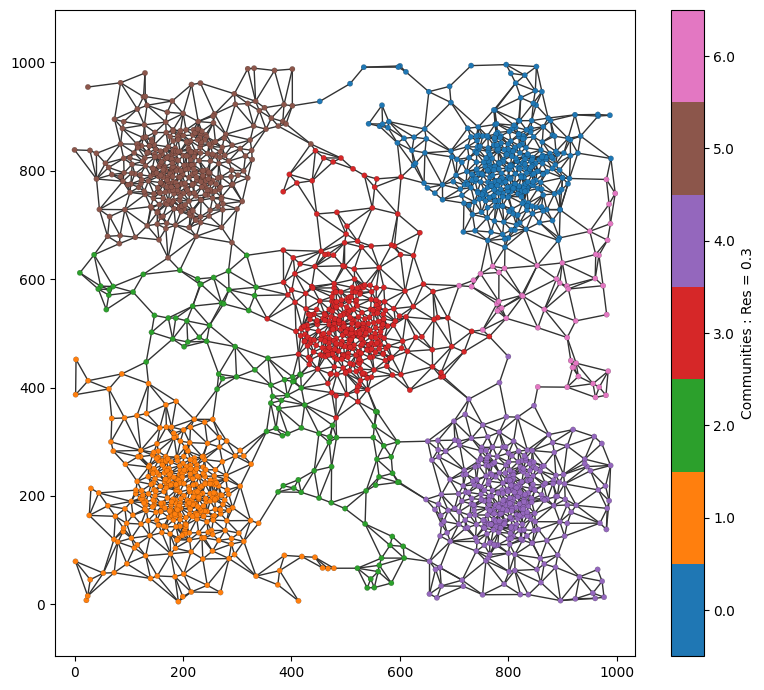

In [8]:
# Visualise the network with communities detected at resolution 0.3
ms.visualise.visualise_network(
    example_domain,
    network_name='Centroid Delaunay',
    visualise_kwargs=dict(
        color_by='Communities : Res = 0.3',
        marker_size=15,
        scatter_kwargs=dict(linewidth=0.1, edgecolor='black')
    ),
    figure_kwargs=dict(figsize=(8, 7))
)

By lowering our resolution paramter, we have clustered our nodes into the expected five communities of this aggregated synthetic dataset.

In summary, this highlights just some of the potential of community detection for exploring spatial relationships in networks. This tutorial focused on the basics of community detection, but there are many ways to adapt and extend these methods. For example, you can modify the network type to represent different spatial relationships or enhance the detection process by incorporating edge weights to reflect varying connection strengths. To explore the full range of possibilities, refer to the comprehensive documentation on community detection.